# <div style="text-align: center;"> Using data analytics and machine learning on Belarus data <div>

### Introduction

This Jupyter Lab research paper code is aimed at conducting data analysis and regression modeling on a dataset. The dataset appears to contain economic and demographic information. The code is divided into several sections, each serving a specific purpose.

## <div style="text-align: center;"> Data Preparation and Visualization <div>

### Data Import and Overview

In [1]:
%run Config.ipynb

This line runs a Jupyter Notebook file named `Config.ipynb`, presumably containing configuration settings and data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wbdata
import seaborn as sns
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
from IPython.display import Image
from matplotlib.ticker import MultipleLocator
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split, cross_val_score

These lines import necessary libraries for data manipulation, visualization, and machine learning.

## <div style="text-align: center;"> Data Preparation</div>

Using the `wbdata` library we get the necessary data for the desired country.

In [ ]:
data = wbdata.get_dataframe(Config.indicators, country=Config.country_code)
df = data.iloc[:33]

## <div style="text-align: center;"> Data Analysis and Visualization </div>

Function `load_and_explore_data` includes:
<ol style="list-style-type: square; padding-left: 20px; margin-bottom: 20px;">
    <li>Information about dataframe</li>
    <li>Summary statistics</li>
    <li>Correlation matrix</li>
</ol>

<class 'wbdata.api.WBDataFrame'>
Index: 33 entries, 2022 to 1990
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GDP                      33 non-null     float64
 1   Gross Capital Formation  33 non-null     float64
 2   Total Employment         33 non-null     float64
dtypes: float64(3)
memory usage: 1.0+ KB
None
               GDP  Gross Capital Formation  Total Employment
date                                                         
2022  7.279346e+10             1.599734e+10         4833522.0
2021  6.967375e+10             1.698681e+10         4892246.0
2020  6.137176e+10             1.684966e+10         4931564.0
2019  6.441011e+10             1.877537e+10         4971033.0
2018  6.003116e+10             1.685604e+10         4998649.0
2017  5.472531e+10             1.533994e+10         5025143.0
2016  4.772355e+10             1.263594e+10         5038419.0
2015  5.645490e+10           

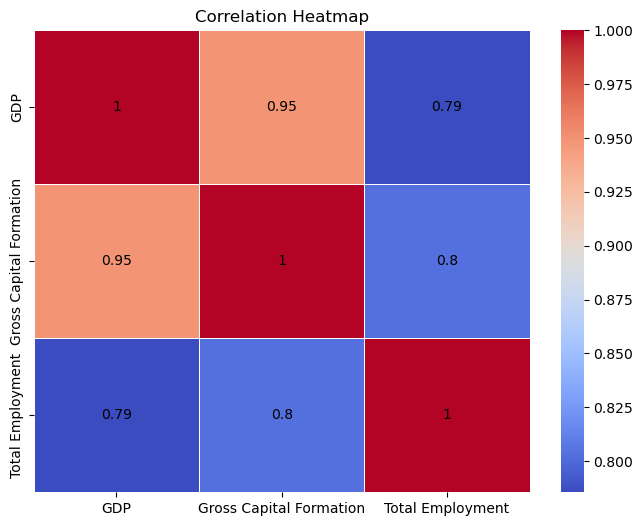

In [4]:
def load_and_explore_data(df):
    print(df.info())
    print(df.head(30))
    print(df.describe())

    correlation_matrix = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, cbar=True, annot_kws={"size": 10, "color": 'black'})
    plt.title('Correlation Heatmap')
    plt.show()

load_and_explore_data(df)

### 3D Analysis

To create a 3D animation for data analysis, several key actions are taken:

- **Define an Initial Figure Function**: Start by defining a function that creates the initial figure, setting up the plot's structure and properties.

- **Create an Update Function**: Next, create an update function responsible for updating the animation frames. This function will modify the data or plot properties at each frame to create the animation effect.

- **Save the Animation**: Finally, once the animation is created and configured, save it to a suitable format, such as a video file or an animated GIF, so that it can be easily shared and used for further analysis.

These steps provide a structured approach to building 3D animations for effective data analysis.

In [ ]:
%%capture --no-stdout
def makeFigure():
    fig = plt.figure(figsize=(12, 10))
    gs = GridSpec(3, 1, height_ratios=[1, 1, 2], hspace=0.3)

    ax = fig.add_subplot(gs[2, 0], projection='3d')
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[0, 0])
    
    ax3.set(yscale='log')

    line, = ax.plot(df['GDP'], df['Gross Capital Formation'], df.index.tolist()[::-1], color='b', linewidth=2)
    
    ax2_line_exports, = ax2.plot(df.index.tolist()[::-1], df['Total Employment'], label='Employment', marker='o', linestyle='-', color='b')
    
    ax3_line_imports, = ax3.plot(df.index.tolist()[::-1], df['Gross Capital Formation'], label='Gross Capital Formation', marker='s', linestyle='--', color='r')
    ax3_line_gdp, = ax3.plot(df.index.tolist()[::-1], df['GDP'], label='GDP', marker='x', linestyle='dashed', color='g')
    ax3.set_ylabel('Values', fontsize=12)
    ax3.set_title('Gross Capital Formation and GDP Over Time', fontsize=16)
    ax3.xaxis.set_major_locator(MultipleLocator(base=5))
    ax3.legend()
    
    ax2.set_ylabel('Values', fontsize=12)
    ax2.set_title('Exports', fontsize=16)
    ax2.xaxis.set_major_locator(MultipleLocator(base=5))
    ax2.legend()

    ax.set_title('GDP vs Gross Capital Formation', fontsize=16)
    ax.set_xlabel('GDP', fontsize=12)
    ax.set_ylabel('Gross Capital Formation', fontsize=12)
    ax.set_zlabel('Year', fontsize=12, rotation=90)

    ax.set(yscale='linear')
    
    return fig, ax, line, ax3, ax2_line_exports, ax3_line_imports, ax3_line_gdp

figcomps = makeFigure()

def update(frame, line, ax3, ax2_line_exports, ax3_line_imports, ax3_line_gdp):
    line.set_data(df['GDP'][:frame], df['Gross Capital Formation'][:frame])
    line.set_3d_properties(df.index.tolist()[::-1][:frame])
    ax2_line_exports.set_data(df.index.tolist()[::-1][:frame], df['Total Employment'][:frame])
    ax3_line_imports.set_data(df.index.tolist()[::-1][:frame], df['Gross Capital Formation'][:frame])
    ax3_line_gdp.set_data(df.index.tolist()[::-1][:frame], df['GDP'][:frame])

    return line, ax2_line_exports, ax3_line_imports, ax3_line_gdp

anim = FuncAnimation(figcomps[0], update, fargs=(figcomps[2], figcomps[3], figcomps[4], figcomps[5], figcomps[6]), frames=len(df.index.tolist()) + 1, interval=500, blit=True,repeat=False, cache_frame_data=False)

_ = anim

anim.save(Config.output_filename_first_anim, writer='pillow', fps=60)

In [ ]:
Image(Config.output_filename_first_anim)

## <div style="text-align: center;"> Machine Learning Models <div>

**Step 1 : Split the data into training and testing sets**

In [ ]:
X, y  = df.drop(columns=['GDP'], axis=1) , df['GDP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Step 2 : Evaluate the models and get the metrics**

In [ ]:
def evaluate_models():
    
    ev_metrics = {'MSE': {}, 'MAE': {}, 'RMSE': {}}
    for name, model in Config.models:
        mae = -cross_val_score(model, X, y, cv=Config.num_folds, scoring='neg_mean_absolute_error')
        mse = -cross_val_score(model, X, y, cv=Config.num_folds, scoring='neg_mean_squared_error')
        RMSE = -cross_val_score(model, X, y, cv=Config.num_folds, scoring='neg_mean_absolute_percentage_error')



        ev_metrics['MSE'][name] = mse
        ev_metrics['MAE'][name] = mae
        ev_metrics['RMSE'][name] = RMSE



    summary_ev_metrics = {
        'MSE': [scores[-1] for scores in ev_metrics['MSE'].values()],
        'MAE': [scores[-1] for scores in ev_metrics['MAE'].values()],
        'RMSE': [np.max(scores) for scores in ev_metrics['RMSE'].values()]
    }
    
    return ev_metrics, summary_ev_metrics

metrics, summary_metrics = evaluate_models()

**Step 3 : Display the summary metrics**

In [ ]:
summary_metrics

## <div style="text-align: center;"> Visualization of Model Performance <div> 

We will analyze the model's performance by visualizing various graphs. The process can be divided into three key steps:

### 1. Loss Plotting

To gain insights into the model's performance, we start by creating a `Loss_Plot` function. This function will display the final values of various metrics, providing an overview of the model's performance.

In [ ]:
def Loss_Plot(model,data):
    x = np.arange(len(model))
    width = 0.25
    multiplier = 0

    fig, ax = plt.subplots(figsize=(10, 6), layout = 'constrained')
    ax.set(yscale='log')

    for attribute, measurement in data.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_ylabel('Value')
    ax.set_title('Loss functions for regressions')
    if len(model) == 3: 
        ax.set_xticks(x + width, [model[0][0],model[1][0],model[2][0]])
    else:
        ax.set_xticks(x + width, [model[0][0],model[1][0],model[2][0],model[3][0]])
    ax.legend(loc='upper right', ncols=3)

    plt.show()

### 2. Animated Training Progress

Next, we'll create animated graphs that allow us to track how different metrics evolve during the training process. These dynamic visuals provide a real-time view of the model's learning journey.

In [ ]:
%%capture --no-stdout
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

def update(frame):
    for i, metric in enumerate(Config.keys_to_select):
        axes[i].clear()
        axes[i].set_title(f"{metric} over Models")
        axes[i].set_xlabel("Models")
        axes[i].set_ylabel(metric)
        axes[i].set(yscale='log')
        
        for model in Config.models:
            axes[i].plot(Config.arr[:frame], metrics[metric][model[0]][:frame], marker='o', label=model[0])
        axes[i].legend(loc='best')
        axes[i].grid()

ani = FuncAnimation(fig, update, frames=len(Config.arr), repeat=False)

_ = ani

ani.save(Config.output_filename_second_anim, writer='pillow', fps=3)

### 3. Visualization and Analysis

In the final step, we'll visualize the obtained graphs. This visual representation helps us analyze the model's behavior and make informed decisions based on the observed trends and patterns.

In [ ]:
Image(Config.output_filename_second_anim)

In [ ]:
Loss_Plot(Config.models,summary_metrics)

## <div style="text-align: center;"> Solow model </div>

In our analysis, we will declare the following variables:

- **Output (GDP)**: This represents the Gross Domestic Product, which is a key economic indicator.
- **Capital**: Capital in this context refers to the labor force, an essential factor in economic production.
- **Labor**: Labor is defined as employment, representing the workforce actively engaged in economic activities.

In [15]:
output = y_test
capital = X_test['Gross Capital Formation']
labor = X_test['Total Employment']

date
1992    1.703704e+10
2012    6.568590e+10
2010    5.723190e+10
2004    2.314159e+10
1993    1.628099e+10
2006    3.696182e+10
2018    6.003116e+10
Name: GDP, dtype: float64
date
1992    5.370370e+09
2012    2.305199e+10
2010    2.326841e+10
2004    6.634070e+09
1993    6.677686e+09
2006    1.189584e+10
2018    1.685604e+10
Name: Gross Capital Formation, dtype: float64
date
1992    4659163.0
2012    5045691.0
2010    5034023.0
2004    4914756.0
1993    4676652.0
2006    4947148.0
2018    4998649.0
Name: Total Employment, dtype: float64


### Solow Growth Model Formula

The Solow Growth Model is a fundamental concept in economics, which describes the evolution of an economy's output over time. The formula for the Solow Growth Model is expressed as:


$$ Y = (K^s) \cdot ((1 - s) \cdot L)^{(1 - s)} \cdot (1 - δ) \cdot K + G \cdot K $$

In [40]:
s = 0.2
δ = 0.1
n = 0.02
g = 0.01

Where:
- \( Y \) represents the output (often Gross Domestic Product, GDP).
- \( K \) is the capital stock.
- \( s \) is the savings rate.
- \( L \) stands for the labor force.
- \( δ \) represents the depreciation rate.
- \( G \) is the technological progress (growth rate).

This formula helps us understand how factors such as capital accumulation, savings, and technological progress influence an economy's long-term growth and output.

In [19]:
solow_pred = []
for i in range(len(capital)):
    solow_pred.append(predict_GDP(capital[i],labor[i]))

Predict GDP and add to all metrics for visualization in `Loss_Plot`

In [20]:
Solov_model = Config.models
Solov_model.append(('Solow model', []))
summary_metrics['MSE'].append(mean_absolute_error(output,solow_pred))
summary_metrics['MAE'].append(mean_squared_error(output,solow_pred))
summary_metrics['RMSE'].append(mean_absolute_percentage_error(output,solow_pred))

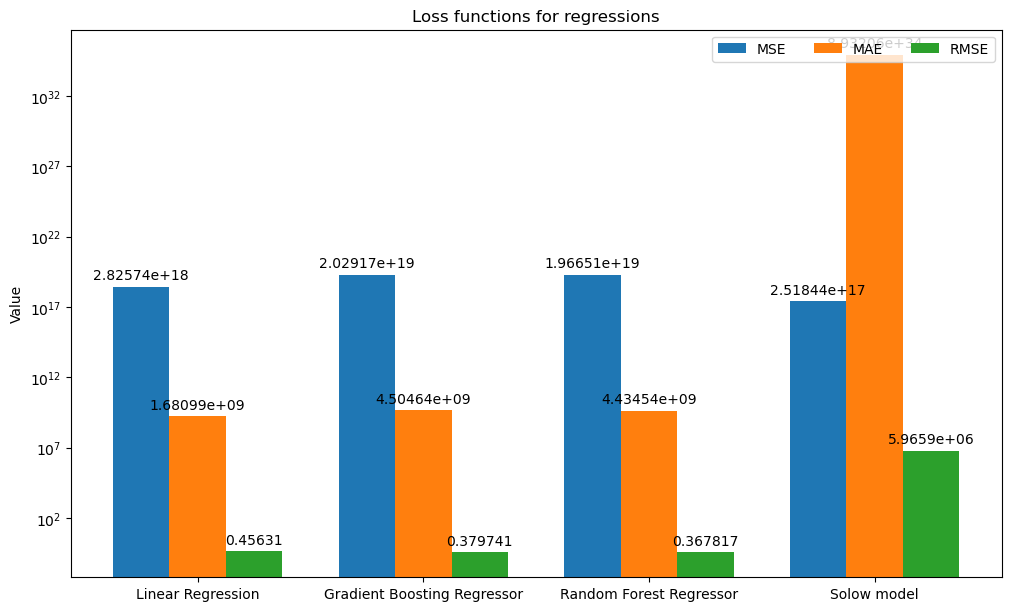

In [21]:
Loss_Plot(Solov_model,summary_metrics)

Based on the graph, we see that the Solow model loses badly to the regressions

## <div style="text-align: center;"> Solow + ML</div>

In this crucial step, we will meticulously select the optimal values for the parameters s, δ, n, and g by harnessing the power of the `scilearn curve_fit` function. This meticulous process ensures that our model is finely tuned for optimal performance.

In [41]:
params, _ = curve_fit(solow_production_function, (capital.values, labor.values), output.values, p0=(0.3, 0.1, 0.02, 0.01), method='trf')
s, δ, n, g = params

After we have selected the parameters we do all the same steps as before 

In [42]:
solow_pred = []
for i in range(len(capital)):
    solow_pred.append(predict_GDP(capital[i],labor[i]))

In [43]:
summary_metrics['MSE'][3]=mean_absolute_error(output,solow_pred)
summary_metrics['MAE'][3]=mean_squared_error(output,solow_pred)
summary_metrics['RMSE'][3]=mean_absolute_percentage_error(output,solow_pred)

In [44]:
output

date
1992    1.703704e+10
2012    6.568590e+10
2010    5.723190e+10
2004    2.314159e+10
1993    1.628099e+10
2006    3.696182e+10
2018    6.003116e+10
Name: GDP, dtype: float64

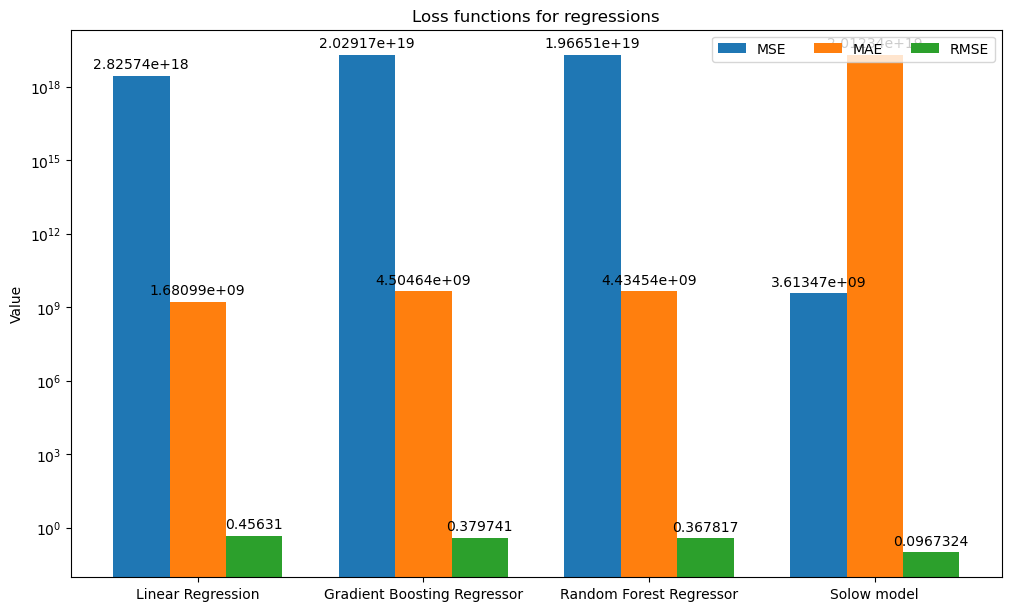

In [45]:
Loss_Plot(Solov_model,summary_metrics)

We can see that with the right parameters Solow performs almost twice as well and shows better results than regressions. 

## <div style="text-align: center;"> Conclusion <div>

### Data

The data analysis reveals a strong correlation among GDP, Gross Capital Formation, and Total Employment. The graphical representations unmistakably illustrate their high degree of correlation over the years.

Notably, the peak values for these variables were observed during the period from 1995 to 2000, followed by a subsequent decline that persisted until 2014. Afterward, the data appear to have stabilized within a consistent range.

### Model

After conducting a meticulous analysis of the model's performance using various metrics, a clear pattern emerged: the Random Forest regressor consistently outperforms other regressor models.

- **Consistent Excellence**: In comparison to other models, the Random Forest Regressor consistently achieved lower loss values and higher accuracy. It exhibited remarkable stability during training, with minimal fluctuations in performance.

- **Solow Model Evaluation**: Initially, the Solow model displayed lackluster results with its original parameters. However, when we optimized these parameters, the Solow model not only caught up but surpassed the regressions by a significant margin.

This underscores the pivotal role that parameters play in the Solow model. To attain maximum results, careful parameter selection is imperative. It's evident that thoughtful tuning can transform the Solow model from an underperformer into a superior choice.

optimize